In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

>>> # Line Detection

# Using Hough Lines

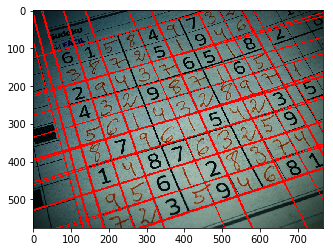

In [43]:
import numpy as np

image = cv2.imread('soduku.jpg')

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)
lines = lines.reshape( lines.shape[0] , lines.shape[-1] )
# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for rho, theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
plt.imshow( image )

# Using Probabilistic Hough Lines

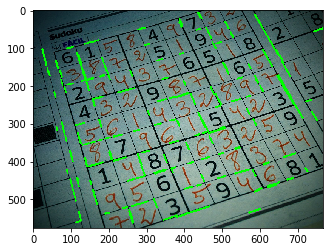

In [49]:
import cv2
import numpy as np

# Grayscale and Canny Edges extracted
image = cv2.imread('soduku.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 5 pixels and max gap between lines of 10 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, 5, 10)
lines = lines.reshape( lines.shape[0] , lines.shape[-1] )

for x1, y1, x2, y2 in lines:
    cv2.line(image, (x1, y1), (x2, y2),(0, 255, 0), 3)

plt.imshow(image)

>>> # Circle Detection

In [64]:
image = cv2.imread('bottlecaps.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(blur,cv2.HOUGH_GRADIENT,3,50,
                            param1=55,param2=125,minRadius=25,maxRadius=45)
image_copy = image.copy()

In [68]:
len(circles[0,:])

76

In [65]:
for i in circles[0,:]:
       # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (255, 0, 0), 2)
      
       # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)

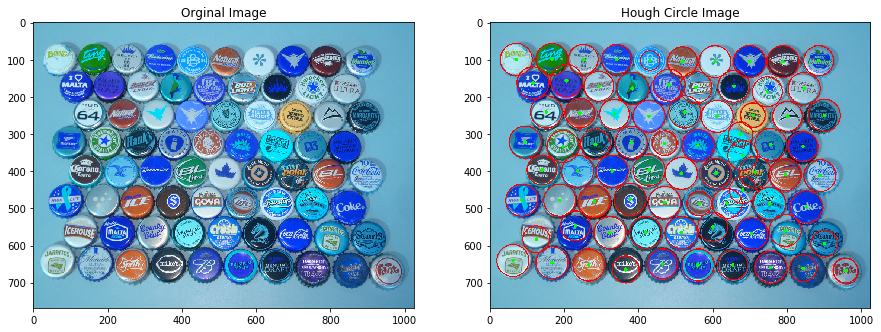

In [66]:
plt.figure(figsize = (15 , 6 ) )

plt.subplot(1,2,1)
plt.title('Orginal Image')
plt.imshow(image_copy)

plt.subplot(1,2,2)
plt.title('Hough Circle Image')
plt.imshow(image)